In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Data Description

- **Number of observations:** 196  
- **Number of variables:** 7  

**Variables:**

- `experience` (categorical): Player's experience level, with five categories – Pro, Veteran, Amateur, Regular, Beginner.
- `subscribe` (logical): Whether the player subscribed to the newsletter. This is our **response variable**.
- `played_hours` (numeric): Total number of hours played on the server.
- `age` (numeric): Age of the player.
- `gender` (categorical): Gender of the player.
- `name` (character): First name of the player (not used in prediction).
- `hashedEmail` (character): Anonymized email address (not used in prediction).

In [3]:
summarize(players, 
          max_hr = max(played_hours, na.rm = TRUE), 
          mean_hr = mean(played_hours, na.rm = TRUE))

max_hr,mean_hr
<dbl>,<dbl>
223.1,5.845918


### Question 

I will answer Question 1. Specifically, I will use player characteristics including `experience`, `age`, `gender`, and `played_hours` to predict whether a player subscribed to the newsletter (`subscribe`), using a K-Nearest Neighbors (KNN) classification model.

Since some of the predictors are categorical (e.g., `experience`, `gender`), I will use one-hot encoding during preprocessing. The target variable (`subscribe`) is logical, which makes this a classification task.Among the predictors, `experience` and `gender` are categorical variables and will be handled using one-hot encoding. `age` and `played_hours` are numeric variables. The target variable `subscribe` is logical, which makes this a classification task.

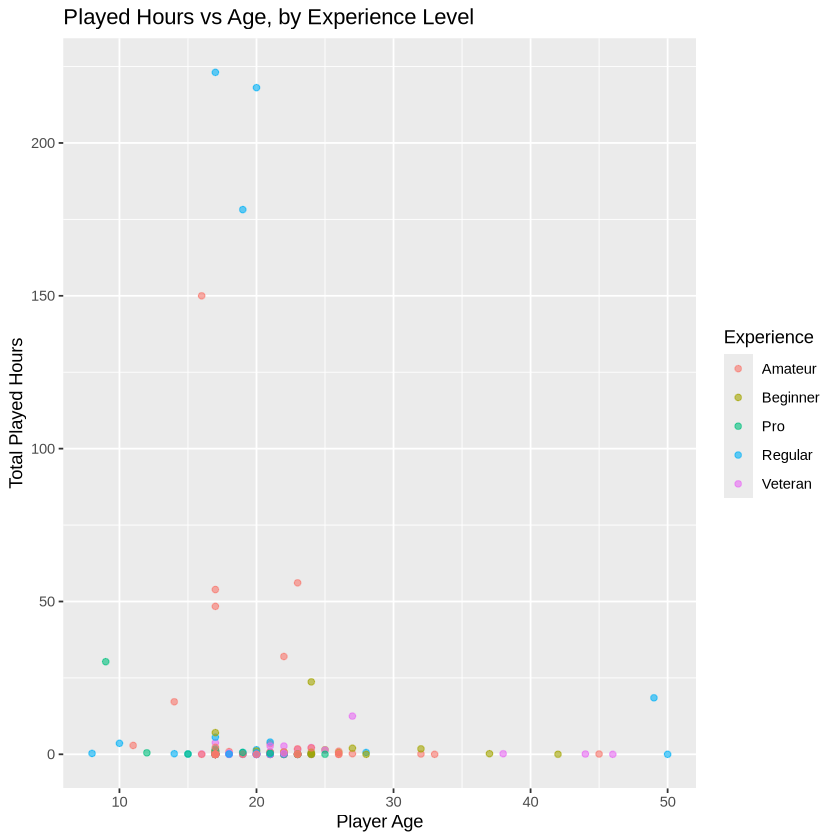

In [4]:
ggplot(drop_na(players, Age, played_hours), aes(x = Age, y = played_hours)) +
  geom_point(aes(color = experience), alpha = 0.6) +
  labs(
    title = "Played Hours vs Age, by Experience Level",
    x = "Player Age",
    y = "Total Played Hours",
    color = "Experience"
  )

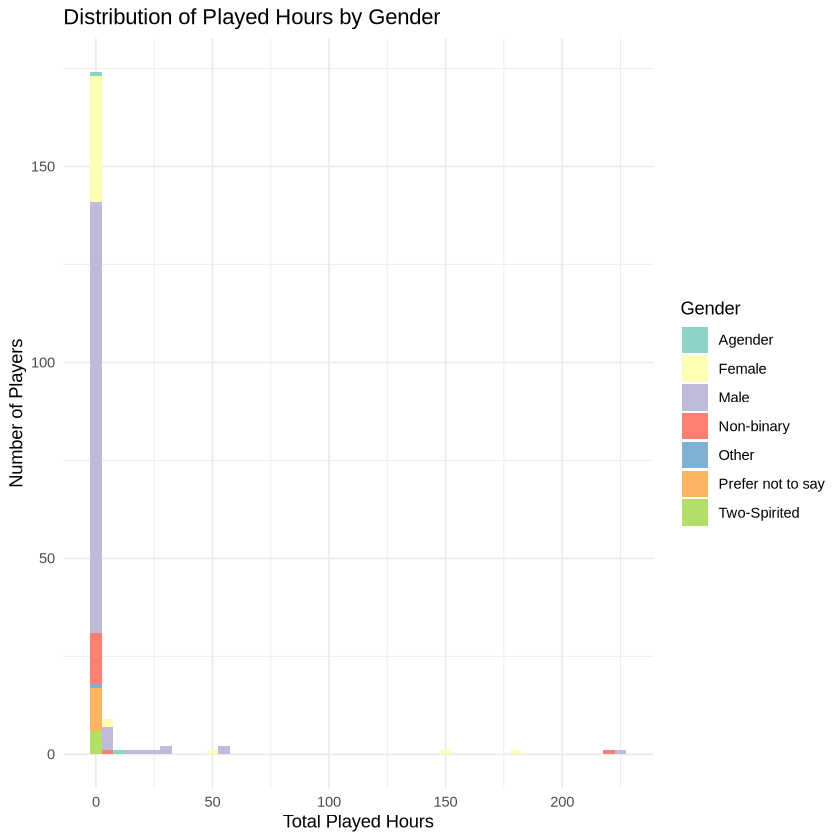

In [6]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(aes(fill = gender), binwidth = 5) +
  labs(
    title = "Distribution of Played Hours by Gender",
    x = "Total Played Hours",
    y = "Number of Players",
    fill = "Gender"
  ) +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal()

In [7]:
players_num <- select(players, played_hours, Age)
players_num |> summarize(mean_hr = mean(played_hours), mean_age = mean(Age, na.rm=TRUE))
players_num |> map_df(mean, na.rm=TRUE)

mean_hr,mean_age
<dbl>,<dbl>
5.845918,20.52062


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062
